# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [64]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [65]:
data = pd.read_csv("data/CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [66]:
cars = np.unique(data['CarName'])
# cars

In [67]:
# brands = []
# for i in cars:
#     brands.append(i.split(' ')[0])

In [68]:
# np.unique(brands)
# # len(np.unique(brands))


In [69]:
data['CarName'] = data['CarName'].apply(lambda a: a.split(' ')[0])   # extracting brands and replacing
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [70]:
# some brand names are wrong
names = {
    'Nissan':'nissan',
    'maxda':'mazda',
    'porcshce':'porsche',
    'toyouta':'toyota',
    'vokswagen':'volkswagen',
    'vw':'volkswagen'
}
# names.values()
# names.keys()

In [71]:
data.CarName.str.lower()
data.CarName = data.CarName.replace(names.keys(), names.values())
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [72]:
np.unique(data['CarName'])

array(['alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [73]:
len(data['CarName'])


205

In [74]:
data.loc[data.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [75]:
# data.columns

In [76]:
# data.describe()

In [77]:
# data.price.describe()

In [78]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [79]:
# plt.plot(data['citympg'])
# plt.plot(data['highwaympg'])

In [80]:
# print(data['citympg'].describe())
# print(data['highwaympg'].describe())

# plt.plot(data['citympg']*.55)
# plt.plot(data['highwaympg']*.45)

In [81]:
# # adding up same kind of featurs categorising overall fuel consumption  55% from citympg and 45% from highwaympg
# data[  'fuel_cons'] = (0.55 * data['citympg']) + (0.45 * data['highwaympg'])
# data.head(3)

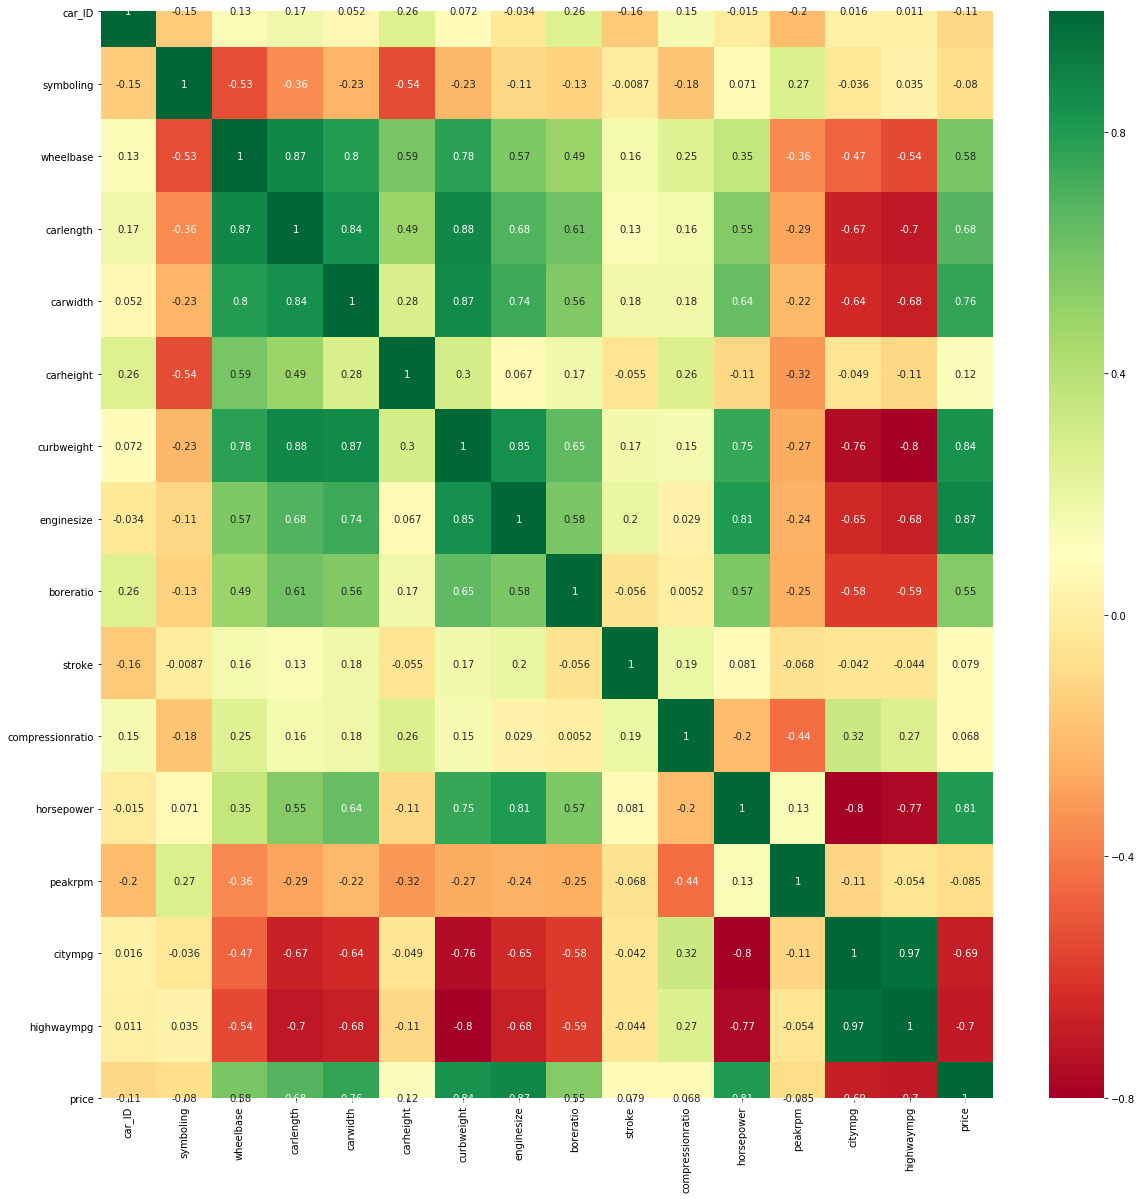

In [121]:
corrm = data.corr()
top_corr = corrm.index
plt.figure(figsize = (20, 20))
sns.heatmap(data[top_corr].corr(), annot = True, cmap="RdYlGn")
plt.show()

In [85]:
featurs = data[['enginetype', 'fueltype', 'aspiration','carbody' , 'drivewheel', 'wheelbase', 'curbweight', 'cylindernumber', 
                'enginesize', 'boreratio', 'horsepower', 'carlength', 'carwidth','fuel_cons', 'price']]
featurs

In [86]:
# pd.value_counts(featurs['drivewheel'])

In [87]:
# ['float64' or 'int64' in featurs_x.info()]
# featurs.info()

In [88]:
alpha_values = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber']
alpha_values

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginetype',
 'cylindernumber']

In [89]:
numaric_value_cols = ['wheelbase', 'enginesize','boreratio','curbweight' ,'horsepower', 'carlength', 'carwidth', 'fuel_cons' ]
# numaric_value_cols

In [90]:
n = featurs[numaric_value_cols]
n.describe()

,wheelbase,enginesize,boreratio,curbweight,horsepower,carlength,carwidth,fuel_cons
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,126.907317,3.329756,2555.565854,104.117073,174.049268,65.907805,27.708780
std,6.021776,41.642693,0.270844,520.680204,39.544167,12.337289,2.145204,6.649183
min,86.600000,61.000000,2.540000,1488.000000,48.000000,141.100000,60.300000,14.800000
25%,94.500000,97.000000,3.150000,2145.000000,70.000000,166.300000,64.100000,21.950000
50%,97.000000,120.000000,3.310000,2414.000000,95.000000,173.200000,65.500000,26.700000
75%,102.400000,141.000000,3.580000,2935.000000,116.000000,183.100000,66.900000,31.800000
max,120.900000,326.000000,3.940000,4066.000000,288.000000,208.100000,72.300000,51.250000


In [91]:
a=featurs[alpha_values]
a

,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber
0,gas,std,convertible,rwd,dohc,four
1,gas,std,convertible,rwd,dohc,four
2,gas,std,hatchback,rwd,ohcv,six
3,gas,std,sedan,fwd,ohc,four
4,gas,std,sedan,4wd,ohc,five
...,...,...,...,...,...,...
200,gas,std,sedan,rwd,ohc,four
201,gas,turbo,sedan,rwd,ohc,four
202,gas,std,sedan,rwd,ohcv,six
203,diesel,turbo,sedan,rwd,ohc,six


In [92]:
# mean = n.mean(axis = 0)
# std = n.std(axis = 0)

# n -= mean
# n /= std


In [93]:
def dummies(x, df):
    dum = pd.get_dummies(df[x], drop_first=True)
    df = pd.concat([df, dum], axis=1)
    df.drop([x],axis = 1 , inplace = True)
    
    return df
a = dummies('fueltype', a)
a = dummies('aspiration', a)
a = dummies('carbody', a)
a = dummies('drivewheel', a)
a = dummies('enginetype', a)
a = dummies('cylindernumber', a)

a

,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
201,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
202,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
203,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0


In [94]:
prep_data = pd.concat([n, a ], axis=1)
print(prep_data.shape)
prep_data

(205, 28)


,wheelbase,enginesize,boreratio,curbweight,horsepower,carlength,carwidth,fuel_cons,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,88.6,130,3.47,2548,111,168.8,64.1,23.70,1,0,...,0,0,0,0,0,1,0,0,0,0
1,88.6,130,3.47,2548,111,168.8,64.1,23.70,1,0,...,0,0,0,0,0,1,0,0,0,0
2,94.5,152,2.68,2823,154,171.2,65.5,22.15,1,0,...,0,0,1,0,0,0,1,0,0,0
3,99.8,109,3.19,2337,102,176.6,66.2,26.70,1,0,...,1,0,0,0,0,1,0,0,0,0
4,99.4,136,3.19,2824,115,176.6,66.4,19.80,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,141,3.78,2952,114,188.8,68.9,25.25,1,0,...,1,0,0,0,0,1,0,0,0,0
201,109.1,141,3.78,3049,160,188.8,68.8,21.70,1,1,...,1,0,0,0,0,1,0,0,0,0
202,109.1,173,3.58,3012,134,188.8,68.9,20.25,1,0,...,0,0,1,0,0,0,1,0,0,0
203,109.1,145,3.01,3217,106,188.8,68.9,26.45,0,1,...,1,0,0,0,0,0,1,0,0,0


In [95]:
data1 = prep_data.copy()
prep_data = data1.drop(['twelve', 'fuel_cons', 'curbweight', 'sedan', 'wagon', 'dohcv'], axis = 1)

In [96]:
mean = prep_data.mean(axis = 0)
std = prep_data.std(axis = 0)

prep_data -= mean
prep_data /= std

In [97]:
labels= (data['price'] / 1000).astype('int64' )
labels

0      13
1      16
2      16
3      13
4      17
       ..
200    16
201    19
202    21
203    22
204    22
Name: price, Length: 205, dtype: int64

In [98]:
train_data = prep_data[:((len(prep_data) * 70) // 100)]
test_data = prep_data[((len(prep_data) * 70) // 100):]

train_label = labels[:((len(prep_data) * 70) // 100)] 
test_label = labels[((len(prep_data) * 70) // 100):]

In [99]:
# ((len(prep_data) * 70) // 100)

In [100]:
# train_data

In [101]:
print(train_data.shape)
print(train_label.shape)

(143, 22)
(143,)


In [102]:
print(test_data.shape)
print(test_label.shape)

(62, 22)
(62,)


In [103]:
val_x = train_data[:((len(train_data) * 20) // 100)]     # split data into 20%  for validation
val_y = train_label[:((len(train_label) * 20) // 100)]

train_x = train_data[((len(train_data) * 20) // 100):]      # split data into 50%  for training
train_y = train_label[((len(train_label) * 20) // 100):]

In [104]:
print(train_x.shape)

(115, 22)


In [146]:
from keras import models
from keras import layers
from keras import regularizers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_x.shape[1],)))
    model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
    
#     model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
#     model.add(layers.Dense(10, activation='relu'))
#     model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['acc'])
    return model

In [147]:
model = build_model()

model.fit(train_x, train_y, epochs = 500,batch_size = 5,  validation_data=(val_x, val_y))

Train on 115 samples, validate on 28 samples
Epoch 1/500
115/115 [==============================] - 0s 3ms/step - loss: 203.8589 - acc: 0.0000e+00 - val_loss: 231.8732 - val_acc: 0.0000e+00
Epoch 2/500
115/115 [==============================] - 0s 385us/step - loss: 137.3216 - acc: 0.0000e+00 - val_loss: 156.5866 - val_acc: 0.0000e+00
Epoch 3/500
115/115 [==============================] - 0s 365us/step - loss: 67.5494 - acc: 0.0522 - val_loss: 82.0652 - val_acc: 0.1786
Epoch 4/500
115/115 [==============================] - 0s 322us/step - loss: 24.4285 - acc: 0.1739 - val_loss: 39.3902 - val_acc: 0.1071
Epoch 5/500
115/115 [==============================] - 0s 296us/step - loss: 13.0391 - acc: 0.0783 - val_loss: 30.3743 - val_acc: 0.1071
Epoch 6/500
115/115 [==============================] - 0s 322us/step - loss: 9.7012 - acc: 0.1130 - val_loss: 27.0641 - val_acc: 0.1071
Epoch 7/500
115/115 [==============================] - 0s 330us/step - loss: 7.9285 - acc: 0.1652 - val_loss: 20.249

115/115 [==============================] - 0s 261us/step - loss: 1.5288 - acc: 0.3913 - val_loss: 13.5038 - val_acc: 0.2143
Epoch 61/500
115/115 [==============================] - 0s 261us/step - loss: 1.6597 - acc: 0.4000 - val_loss: 14.5701 - val_acc: 0.2143
Epoch 62/500
115/115 [==============================] - 0s 252us/step - loss: 1.5842 - acc: 0.3913 - val_loss: 14.1270 - val_acc: 0.1786
Epoch 63/500
115/115 [==============================] - 0s 252us/step - loss: 1.5977 - acc: 0.4000 - val_loss: 14.3383 - val_acc: 0.2143
Epoch 64/500
115/115 [==============================] - 0s 261us/step - loss: 1.7404 - acc: 0.3478 - val_loss: 14.0765 - val_acc: 0.1786
Epoch 65/500
115/115 [==============================] - 0s 252us/step - loss: 1.5352 - acc: 0.4609 - val_loss: 15.0124 - val_acc: 0.2143
Epoch 66/500
115/115 [==============================] - 0s 261us/step - loss: 1.6302 - acc: 0.3826 - val_loss: 12.0701 - val_acc: 0.2857
Epoch 67/500
115/115 [==============================] 

Epoch 120/500
115/115 [==============================] - 0s 270us/step - loss: 1.3554 - acc: 0.4609 - val_loss: 16.0766 - val_acc: 0.1786
Epoch 121/500
115/115 [==============================] - 0s 261us/step - loss: 1.4061 - acc: 0.3913 - val_loss: 14.2035 - val_acc: 0.2500
Epoch 122/500
115/115 [==============================] - 0s 270us/step - loss: 1.5517 - acc: 0.4435 - val_loss: 15.9243 - val_acc: 0.2143
Epoch 123/500
115/115 [==============================] - 0s 270us/step - loss: 1.4612 - acc: 0.4174 - val_loss: 14.7824 - val_acc: 0.2500
Epoch 124/500
115/115 [==============================] - 0s 278us/step - loss: 1.3874 - acc: 0.4435 - val_loss: 15.4922 - val_acc: 0.2143
Epoch 125/500
115/115 [==============================] - 0s 287us/step - loss: 1.5660 - acc: 0.3739 - val_loss: 15.3043 - val_acc: 0.2857
Epoch 126/500
115/115 [==============================] - 0s 270us/step - loss: 1.3703 - acc: 0.4783 - val_loss: 15.3218 - val_acc: 0.2500
Epoch 127/500
115/115 [===========

115/115 [==============================] - 0s 270us/step - loss: 1.3272 - acc: 0.4870 - val_loss: 16.9976 - val_acc: 0.2143
Epoch 180/500
115/115 [==============================] - 0s 270us/step - loss: 1.3686 - acc: 0.4174 - val_loss: 16.4163 - val_acc: 0.1429
Epoch 181/500
115/115 [==============================] - 0s 252us/step - loss: 1.4074 - acc: 0.4522 - val_loss: 16.7705 - val_acc: 0.1429
Epoch 182/500
115/115 [==============================] - 0s 270us/step - loss: 1.2660 - acc: 0.4435 - val_loss: 15.5708 - val_acc: 0.2857
Epoch 183/500
115/115 [==============================] - 0s 261us/step - loss: 1.2435 - acc: 0.4348 - val_loss: 17.6140 - val_acc: 0.1786
Epoch 184/500
115/115 [==============================] - 0s 261us/step - loss: 1.3279 - acc: 0.4261 - val_loss: 16.7116 - val_acc: 0.1429
Epoch 185/500
115/115 [==============================] - 0s 270us/step - loss: 1.2679 - acc: 0.4522 - val_loss: 17.5353 - val_acc: 0.2857
Epoch 186/500
115/115 [=========================

115/115 [==============================] - 0s 261us/step - loss: 1.3529 - acc: 0.4696 - val_loss: 17.1735 - val_acc: 0.2143
Epoch 239/500
115/115 [==============================] - 0s 270us/step - loss: 1.3226 - acc: 0.4435 - val_loss: 16.9760 - val_acc: 0.2143
Epoch 240/500
115/115 [==============================] - 0s 261us/step - loss: 1.3453 - acc: 0.4348 - val_loss: 18.7219 - val_acc: 0.2143
Epoch 241/500
115/115 [==============================] - 0s 270us/step - loss: 1.3615 - acc: 0.4609 - val_loss: 18.6351 - val_acc: 0.2143
Epoch 242/500
115/115 [==============================] - 0s 261us/step - loss: 1.2786 - acc: 0.4522 - val_loss: 17.8469 - val_acc: 0.2143
Epoch 243/500
115/115 [==============================] - 0s 270us/step - loss: 1.3348 - acc: 0.4174 - val_loss: 17.1308 - val_acc: 0.2500
Epoch 244/500
115/115 [==============================] - 0s 261us/step - loss: 1.3861 - acc: 0.4783 - val_loss: 18.2691 - val_acc: 0.1429
Epoch 245/500
115/115 [=========================

115/115 [==============================] - 0s 296us/step - loss: 1.2235 - acc: 0.4609 - val_loss: 17.6574 - val_acc: 0.1429
Epoch 298/500
115/115 [==============================] - 0s 278us/step - loss: 1.2735 - acc: 0.5217 - val_loss: 17.4410 - val_acc: 0.2857
Epoch 299/500
115/115 [==============================] - 0s 270us/step - loss: 1.1578 - acc: 0.5043 - val_loss: 17.6209 - val_acc: 0.2143
Epoch 300/500
115/115 [==============================] - 0s 270us/step - loss: 1.2573 - acc: 0.5130 - val_loss: 19.0317 - val_acc: 0.2143
Epoch 301/500
115/115 [==============================] - 0s 270us/step - loss: 1.2894 - acc: 0.4522 - val_loss: 18.1404 - val_acc: 0.2500
Epoch 302/500
115/115 [==============================] - 0s 270us/step - loss: 1.4742 - acc: 0.4870 - val_loss: 17.4997 - val_acc: 0.2500
Epoch 303/500
115/115 [==============================] - 0s 270us/step - loss: 1.2300 - acc: 0.5130 - val_loss: 18.0900 - val_acc: 0.2143
Epoch 304/500
115/115 [=========================

115/115 [==============================] - 0s 261us/step - loss: 1.3930 - acc: 0.5043 - val_loss: 18.6337 - val_acc: 0.2143
Epoch 357/500
115/115 [==============================] - 0s 270us/step - loss: 1.1451 - acc: 0.4522 - val_loss: 18.4718 - val_acc: 0.1786
Epoch 358/500
115/115 [==============================] - 0s 270us/step - loss: 1.3354 - acc: 0.4870 - val_loss: 18.0183 - val_acc: 0.2143
Epoch 359/500
115/115 [==============================] - 0s 278us/step - loss: 1.3451 - acc: 0.4348 - val_loss: 17.8902 - val_acc: 0.1429
Epoch 360/500
115/115 [==============================] - 0s 278us/step - loss: 1.2587 - acc: 0.5130 - val_loss: 16.7563 - val_acc: 0.1786
Epoch 361/500
115/115 [==============================] - 0s 252us/step - loss: 1.3298 - acc: 0.5043 - val_loss: 18.0513 - val_acc: 0.2500
Epoch 362/500
115/115 [==============================] - 0s 261us/step - loss: 1.3132 - acc: 0.4609 - val_loss: 18.7905 - val_acc: 0.2143
Epoch 363/500
115/115 [=========================

115/115 [==============================] - 0s 426us/step - loss: 1.2347 - acc: 0.4783 - val_loss: 19.0434 - val_acc: 0.2857
Epoch 416/500
115/115 [==============================] - 0s 391us/step - loss: 1.1763 - acc: 0.5217 - val_loss: 18.1354 - val_acc: 0.2857
Epoch 417/500
115/115 [==============================] - 0s 365us/step - loss: 1.2569 - acc: 0.4957 - val_loss: 17.8769 - val_acc: 0.1786
Epoch 418/500
115/115 [==============================] - 0s 322us/step - loss: 1.2180 - acc: 0.4609 - val_loss: 19.5166 - val_acc: 0.1429
Epoch 419/500
115/115 [==============================] - 0s 287us/step - loss: 1.3358 - acc: 0.5043 - val_loss: 18.6479 - val_acc: 0.1786
Epoch 420/500
115/115 [==============================] - 0s 304us/step - loss: 1.1676 - acc: 0.5217 - val_loss: 18.6383 - val_acc: 0.1429
Epoch 421/500
115/115 [==============================] - 0s 296us/step - loss: 1.2757 - acc: 0.4609 - val_loss: 18.5252 - val_acc: 0.2500
Epoch 422/500
115/115 [=========================

115/115 [==============================] - 0s 304us/step - loss: 1.0653 - acc: 0.5043 - val_loss: 20.2273 - val_acc: 0.1071
Epoch 475/500
115/115 [==============================] - 0s 330us/step - loss: 1.3819 - acc: 0.4870 - val_loss: 19.2099 - val_acc: 0.2143
Epoch 476/500
115/115 [==============================] - 0s 296us/step - loss: 1.2824 - acc: 0.4609 - val_loss: 17.5693 - val_acc: 0.2143
Epoch 477/500
115/115 [==============================] - 0s 287us/step - loss: 1.2317 - acc: 0.4696 - val_loss: 16.5100 - val_acc: 0.2500
Epoch 478/500
115/115 [==============================] - 0s 287us/step - loss: 1.1379 - acc: 0.5304 - val_loss: 18.9068 - val_acc: 0.1786
Epoch 479/500
115/115 [==============================] - 0s 296us/step - loss: 1.1795 - acc: 0.5043 - val_loss: 17.8412 - val_acc: 0.1429
Epoch 480/500
115/115 [==============================] - 0s 287us/step - loss: 1.2336 - acc: 0.4783 - val_loss: 17.9332 - val_acc: 0.2143
Epoch 481/500
115/115 [=========================

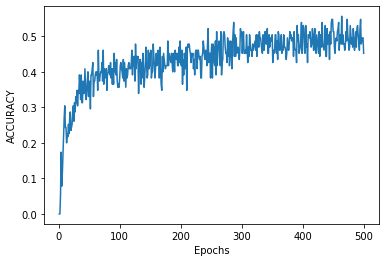

In [148]:
acc = model.history.history['acc']
plt.plot(range(1, len(acc) + 1), acc)
plt.xlabel('Epochs')
plt.ylabel('ACCURACY')
plt.show()

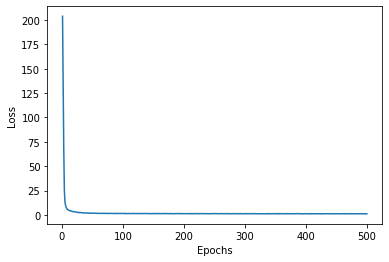

In [149]:
loss = model.history.history['loss']
plt.plot(range(1, len(loss) + 1), loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [150]:
results = model.evaluate(test_data, test_label)
results

62/62 [==============================] - 0s 65us/step


[15.24507676401446, 0.17741934955120087]

In [151]:
model.predict(test_data) *1000

array([[ 8146.1753],
       [ 8833.534 ],
       [10339.238 ],
       [ 7125.2754],
       [ 8152.78  ],
       [ 8859.912 ],
       [10406.266 ],
       [ 5216.383 ],
       [ 5216.383 ],
       [ 5216.383 ],
       [ 6089.551 ],
       [ 3945.133 ],
       [ 3945.133 ],
       [ 6344.894 ],
       [ 6950.4595],
       [ 8010.458 ],
       [ 7359.264 ],
       [ 6344.894 ],
       [ 6950.4595],
       [ 6344.894 ],
       [ 6603.9707],
       [ 6804.075 ],
       [ 7672.2144],
       [ 6162.222 ],
       [18218.037 ],
       [18218.037 ],
       [14045.736 ],
       [18218.037 ],
       [14045.736 ],
       [16811.166 ],
       [ 9736.541 ],
       [ 6187.922 ],
       [10004.173 ],
       [ 9736.541 ],
       [10004.173 ],
       [19505.658 ],
       [19505.658 ],
       [22594.396 ],
       [22013.102 ],
       [ 7676.28  ],
       [ 8053.214 ],
       [ 7676.28  ],
       [ 8053.214 ],
       [ 8053.214 ],
       [ 5319.816 ],
       [ 9796.434 ],
       [ 8304.643 ],
       [ 7909

In [111]:
# # using K_fold validation technique

# k = 4
# num_val_samples = len(train_data) // k
# # num_epochs = 500
# num_epochs = 100
# all_history = []
# for i in range(k):
#     print('processing fold #', i)
    
#     val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    
#     val_targets = train_label[i * num_val_samples: (i + 1) * num_val_samples]
    
#     partial_train_data = np.concatenate(
#             [train_data[:i * num_val_samples],
#             train_data[(i + 1) * num_val_samples:]],
#             axis=0)
    
#     partial_train_targets = np.concatenate(
#             [train_label[:i * num_val_samples],
#             train_label[(i + 1) * num_val_samples:]],
#             axis=0)
    
    
#     model = build_model()
#     model.fit(partial_train_data, partial_train_targets,
#     epochs=num_epochs, batch_size=1, verbose=0)
#     all_history.append(model.history.history)
#     if k == i+1:
#         print("-------------Training Completed-------------")

In [112]:
# all_acc = []
# all_loss = []
# for i in all_history:
#     all_acc.append(i['acc'])
#     all_loss.append(i['loss'])

In [113]:
# # 
# acc = all_acc
# for a in acc:
#     plt.subplot(1, 2, 1)
#     plt.plot(range(1, len(a) + 1), a)
#     plt.xlabel('Epochs')
#     plt.ylabel('ACCURACY')
#     plt.show()

In [114]:
# loss = all_loss
# for a in loss:
#     plt.subplot(1, 2, 1)
#     plt.plot(range(1, len(a) + 1), a)
#     plt.xlabel('Epochs')
#     plt.ylabel('LOSS')
#     plt.show()

In [115]:
# model.predict(test_data) *1000

In [152]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 64)                1472      
_________________________________________________________________
dense_52 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_53 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 17        
Total params: 2,801
Trainable params: 2,801
Non-trainable params: 0
_________________________________________________________________
